In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
%matplotlib inline

###  Получаем данные

In [180]:
train = pd.read_csv("data/train(1).csv")
test = pd.read_csv("data/test(1).csv")

In [181]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [182]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Информация о содержимом датафрейма

In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###  Основные показатели статистики

In [184]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [185]:
 train.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

### Группировка по Pclass, с нахождением среднего значения по Survived, с сортировкой по Survived (возрастание)

In [186]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


### Группировка по Sex, с нахождением среднего значения по Survived, с сортировкой по Survived (возрастание)

In [187]:
train[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


### Линейный график по Age по survived  (Люди с каким возрастом умерли или выжили)

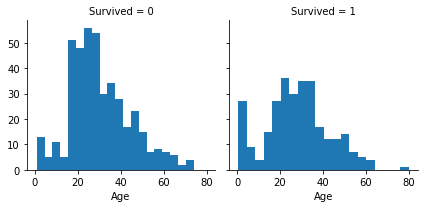

In [188]:
plot = sns.FacetGrid(train, col="Survived")
plot.map(plt.hist, "Age", bins = 20)

### Линейный график по Survived и Pclass, от Age (То есть, более детальная аналитика показывающее, возраста пассажиров того или иного класса и информацией о том, выжил или умер пассажир по классам пассажиров)

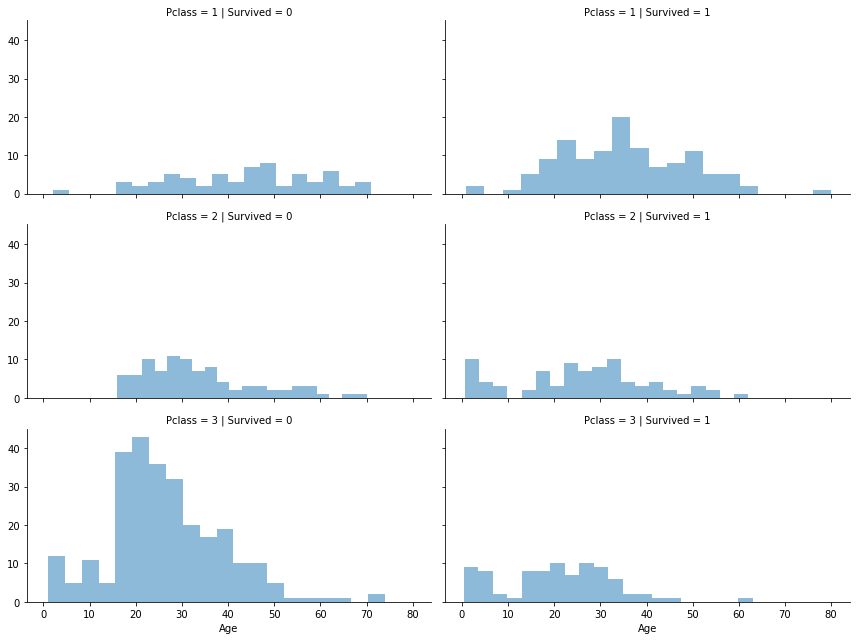

In [189]:
plot = sns.FacetGrid(train, col="Survived", row = "Pclass", height = 3, aspect = 2)
plot.map(plt.hist, "Age", alpha = 0.5, bins = 20)

### Линейный график по Survived и Embarked, от Sex (То есть, более детальная аналитика показывающее, Пол пассажиров того или иного класса и информацией о том, выжил или умер пассажир по портам посадки)

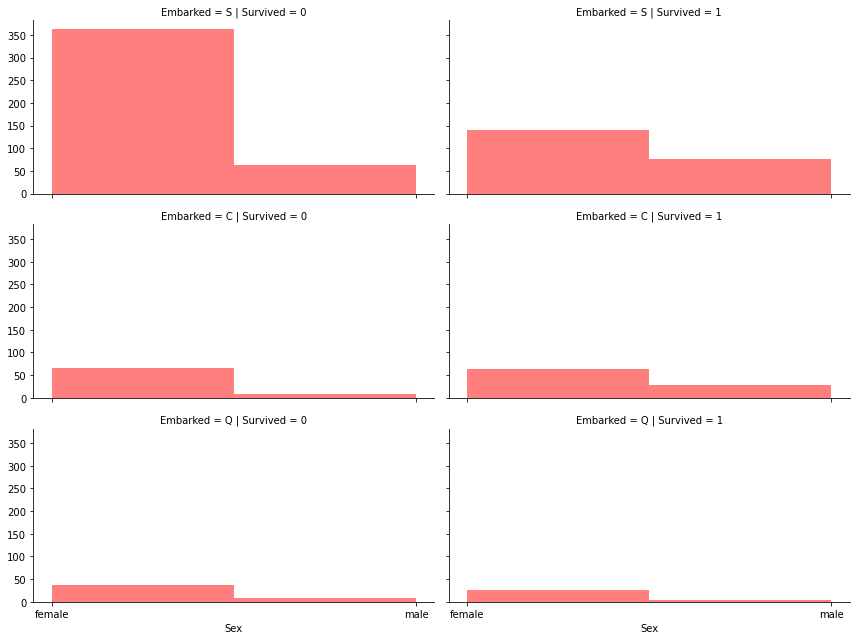

In [190]:
plot = sns.FacetGrid(train, col="Survived", row = "Embarked", height = 3, aspect = 2)
plot.map(plt.hist, "Sex", alpha = 0.5, bins = 2, color = "red")

In [191]:
print("AS IS", train.shape, test.shape)

AS IS (891, 12) (418, 11)


### Удаляем столбец Ticket и Cabin

In [192]:
train_1 = train.drop(["Ticket", "Cabin"], axis = 1)
test_1 = test.drop(["Ticket", "Cabin"], axis = 1)

In [193]:
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [194]:
test_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [195]:
print("After drop: ", train_1.shape, test_1.shape)

After drop:  (891, 10) (418, 9)


### Создаем кросс-таблицу

In [196]:
combine = [train_1, test_1]
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
pd.crosstab(train_1["Title"], train_1["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


### Меняем слова на Rare, Miss, Mrs, и группируем по Title и выводим среднее по Survived 

In [197]:
rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"]
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(rare_titles, "Rare")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
train_1[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


### Меняем female, male на 0  и 1

In [198]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].replace("female", 1)
    dataset["Sex"] = dataset["Sex"].replace("male", 0)

In [199]:
train_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr


### Выводим информацию о датафрейме.

In [200]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


# Домашнее задание
Заменить возраст на год рождения
<br>
Переименовать колонки на русский язык
<br>
Добавить колонку с количеством родственников
<br>
Добавить комментарии ко всем функциям

### Заменить возраст на год рождения

In [201]:
train_1["Age"] = train_1["Age"].fillna(0) #вместо пустых ставим 0
train_1["Age"] = (2022 - train_1["Age"]).astype(int) #приводим к году рождения и заменяем тип на инт

In [202]:
train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2000,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1984,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,1996,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1987,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,1987,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1995,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",1,2003,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2022,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,1996,0,0,30.0000,C,Mr


### Переименовать колонки на русский язык

In [203]:
train_1.rename(columns={"PassengerId": "АйдиПассажира", "Survived": "Выжил", "Pclass": "Класс Пассажира", "Name": "Имя","Sex" : "Пол", "SibSp": "Количество братьев и сестер", "Parch": "Количество родителей и детей", "Fare" : "Плата за проезд", "Embarked": "Порт посадки", "Title": "Форма обращения"}, errors="raise", inplace = True) #переименовываем колонки

In [204]:
train_1

,АйдиПассажира,Выжил,Класс Пассажира,Имя,Пол,Age,Количество братьев и сестер,Количество родителей и детей,Плата за проезд,Порт посадки,Форма обращения
0,1,0,3,"Braund, Mr. Owen Harris",0,2000,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1984,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,1996,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1987,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,1987,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1995,0,0,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",1,2003,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2022,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,1996,0,0,30.0000,C,Mr


### Добавить колонку с количеством родственников

In [206]:
train_1["Количество родственников"] = train_1["Количество братьев и сестер"] + train_1["Количество родителей и детей"] #счтаем кол-во родственников
train_1

,АйдиПассажира,Выжил,Класс Пассажира,Имя,Пол,Age,Количество братьев и сестер,Количество родителей и детей,Плата за проезд,Порт посадки,Форма обращения,Количество родственников
0,1,0,3,"Braund, Mr. Owen Harris",0,2000,1,0,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1984,1,0,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1996,0,0,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1987,1,0,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",0,1987,0,0,8.0500,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1995,0,0,13.0000,S,Rare,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,2003,0,0,30.0000,S,Miss,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,2022,1,2,23.4500,S,Miss,3
889,890,1,1,"Behr, Mr. Karl Howell",0,1996,0,0,30.0000,C,Mr,0
